# **Applied Machine Learning Homework 5**
**Due 02 Dec 2023 (Tuesday) 11:59PM EST**

Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).

2) Please include your Name and UNI below.

## Name : Xinyu Li

## UNI : XL3228

## Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, MaxPooling2D, BatchNormalization
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

In [2]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [3]:
#Your code here
# Create the LeNet-5 model
cnn = Sequential()
cnn.add(Conv2D(6, kernel_size = (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3), name='conv_1'))
cnn.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_1'))
cnn.add(Conv2D(16, kernel_size = (5, 5), strides=(1, 1), padding='valid', activation='relu', name='conv_2'))
cnn.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_2'))
cnn.add(Conv2D(120, kernel_size = (5, 5), activation='relu', name='conv_3'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu', name='dense_1'))
cnn.add(Dense(10, activation='softmax', name='output'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

3.2 Report the model summary

In [4]:
#Your code here
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 6)         0         
                                                                 
 conv_2 (Conv2D)             (None, 12, 12, 16)        2416      
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 6, 6, 16)          0         
                                                                 
 conv_3 (Conv2D)             (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense_1 (Dense)             (None, 84)                4

###3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [5]:
#Your code here
y_train_one_hot = to_categorical(y_train, 10)
y_val_one_hot = to_categorical(y_val, 10)
cnn_history = cnn.fit(X_train, y_train_one_hot, epochs=20,validation_data=(X_val, y_val_one_hot), batch_size=64)

Epoch 1/20
625/625 [==============================] - 53s 83ms/step - loss: 1.6699 - accuracy: 0.3911 - val_loss: 1.4920 - val_accuracy: 0.4540
Epoch 2/20
625/625 [==============================] - 48s 76ms/step - loss: 1.3796 - accuracy: 0.5034 - val_loss: 1.3601 - val_accuracy: 0.5155
Epoch 3/20
625/625 [==============================] - 47s 75ms/step - loss: 1.2539 - accuracy: 0.5510 - val_loss: 1.2253 - val_accuracy: 0.5676
Epoch 4/20
625/625 [==============================] - 49s 79ms/step - loss: 1.1662 - accuracy: 0.5846 - val_loss: 1.2232 - val_accuracy: 0.5686
Epoch 5/20
625/625 [==============================] - 49s 78ms/step - loss: 1.0956 - accuracy: 0.6116 - val_loss: 1.1505 - val_accuracy: 0.5978
Epoch 6/20
625/625 [==============================] - 47s 75ms/step - loss: 1.0348 - accuracy: 0.6373 - val_loss: 1.1780 - val_accuracy: 0.5919
Epoch 7/20
625/625 [==============================] - 48s 77ms/step - loss: 0.9867 - accuracy: 0.6512 - val_loss: 1.0736 - val_accuracy:

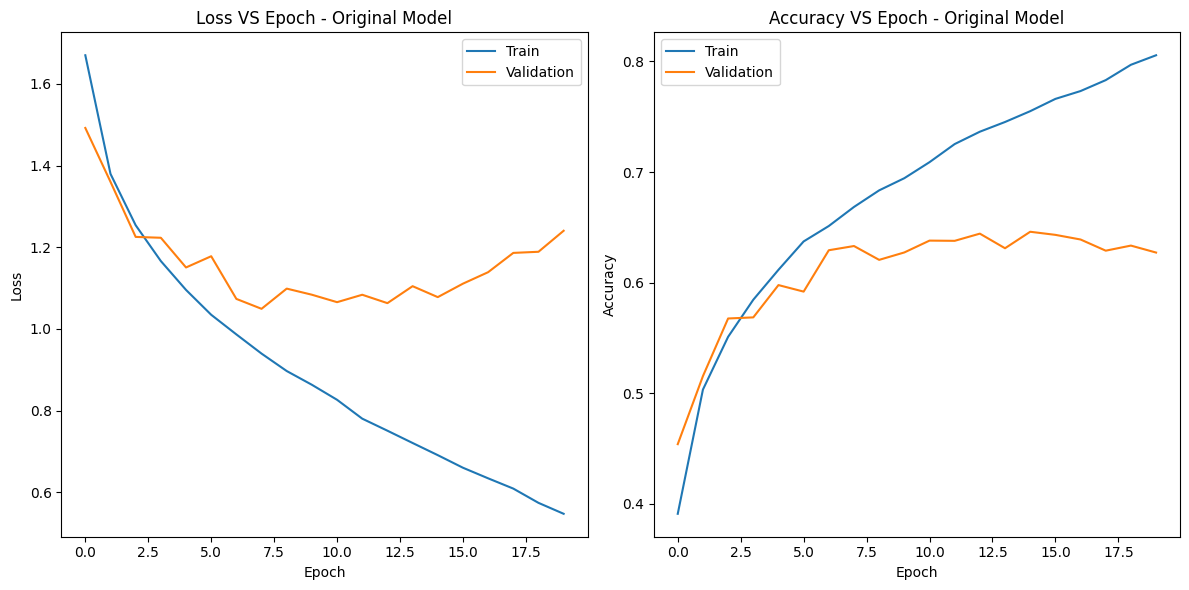

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(cnn_history.history['loss'], label='Train')
axes[0].plot(cnn_history.history['val_loss'], label='Validation')
axes[0].set_title('Loss VS Epoch - Original Model')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(cnn_history.history['accuracy'], label='Train')
axes[1].plot(cnn_history.history['val_accuracy'], label='Validation')
axes[1].set_title('Accuracy VS Epoch - Original Model')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [7]:
#Your code here
test_loss, test_accuracy = cnn.evaluate(x_test, to_categorical(y_test, 10))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 4s 13ms/step - loss: 1.2495 - accuracy: 0.6205
Test Loss: 1.2495
Test Accuracy: 0.6205


In [8]:
#hyperparameter tuning
results = list()
for size in [64, 128]:
  for opt in ['adam', 'sgd']:
    print(f"cnn with batch_size {size} and optimizer: {opt}")
    cnn = Sequential()
    cnn.add(Conv2D(6, kernel_size = (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3), name='conv_1'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_1'))
    cnn.add(Conv2D(16, kernel_size = (5, 5), strides=(1, 1), padding='valid', activation='relu', name='conv_2'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_2'))
    cnn.add(Conv2D(120, kernel_size = (5, 5), activation='relu', name='conv_3'))
    cnn.add(Flatten())
    cnn.add(Dense(84, activation='relu', name='dense_1'))
    cnn.add(Dense(10, activation='softmax', name='output'))
    cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_history = cnn.fit(X_train, y_train_one_hot, epochs=20,validation_data=(X_val, y_val_one_hot), batch_size=size)
    results.append((("batch_size", size),("optimizer", opt),("validation accuracy", cnn_history.history['val_accuracy'][-1])))
print("display validation results")
for result in results:
  print(result)
best_combination = max(results, key=lambda x: x[2][1])
print()
print(f"best parameter combination: {best_combination}")



cnn with batch_size 64 and optimizer: adam
Epoch 1/20
625/625 [==============================] - 47s 73ms/step - loss: 1.6937 - accuracy: 0.3711 - val_loss: 1.5079 - val_accuracy: 0.4396
Epoch 2/20
625/625 [==============================] - 45s 72ms/step - loss: 1.4086 - accuracy: 0.4866 - val_loss: 1.3535 - val_accuracy: 0.5028
Epoch 3/20
625/625 [==============================] - 45s 72ms/step - loss: 1.2812 - accuracy: 0.5391 - val_loss: 1.2863 - val_accuracy: 0.5372
Epoch 4/20
625/625 [==============================] - 46s 73ms/step - loss: 1.1862 - accuracy: 0.5775 - val_loss: 1.1800 - val_accuracy: 0.5718
Epoch 5/20
625/625 [==============================] - 45s 72ms/step - loss: 1.1182 - accuracy: 0.6002 - val_loss: 1.1545 - val_accuracy: 0.5822
Epoch 6/20
625/625 [==============================] - 46s 73ms/step - loss: 1.0542 - accuracy: 0.6265 - val_loss: 1.1442 - val_accuracy: 0.5971
Epoch 7/20
625/625 [==============================] - 46s 74ms/step - loss: 0.9979 - accuracy

3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

3.4.1 Dropout

In [ ]:
#Your code here
cnn_dropout = Sequential()

cnn_dropout.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3), name='conv_1'))
cnn_dropout.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_1'))
cnn_dropout.add(Dropout(0.3))

cnn_dropout.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', name='conv_2'))
cnn_dropout.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_2'))
cnn_dropout.add(Dropout(0.3))

cnn_dropout.add(Conv2D(120, kernel_size=(5, 5), activation='relu', name='conv_3'))
cnn_dropout.add(Flatten())
cnn_dropout.add(Dropout(0.3))

cnn_dropout.add(Dense(84, activation='relu', name='dense_1'))
cnn_dropout.add(Dropout(0.3))

cnn_dropout.add(Dense(10, activation='softmax', name='output'))

cnn_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_dropout_history = cnn_dropout.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_val, y_val_one_hot), batch_size=128)

Epoch 1/20
313/313 [==============================] - 53s 165ms/step - loss: 1.9711 - accuracy: 0.2664 - val_loss: 1.6693 - val_accuracy: 0.4103
Epoch 2/20
313/313 [==============================] - 44s 141ms/step - loss: 1.6403 - accuracy: 0.4027 - val_loss: 1.4560 - val_accuracy: 0.4702
Epoch 3/20
313/313 [==============================] - 44s 141ms/step - loss: 1.5229 - accuracy: 0.4491 - val_loss: 1.3879 - val_accuracy: 0.5021
Epoch 4/20
313/313 [==============================] - 44s 139ms/step - loss: 1.4588 - accuracy: 0.4744 - val_loss: 1.3509 - val_accuracy: 0.5120
Epoch 5/20
313/313 [==============================] - 44s 140ms/step - loss: 1.4094 - accuracy: 0.4932 - val_loss: 1.2795 - val_accuracy: 0.5441
Epoch 6/20
313/313 [==============================] - 43s 136ms/step - loss: 1.3823 - accuracy: 0.5050 - val_loss: 1.2956 - val_accuracy: 0.5371
Epoch 7/20
313/313 [==============================] - 43s 137ms/step - loss: 1.3597 - accuracy: 0.5128 - val_loss: 1.2550 - val_ac

In [ ]:
#Your code here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(cnn_dropout_history.history['loss'], label='Train')
axes[0].plot(cnn_dropout_history.history['val_loss'], label='Validation')
axes[0].set_title('Loss VS Epoch - Dropout')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(cnn_dropout_history.history['accuracy'], label='Train')
axes[1].plot(cnn_dropout_history.history['val_accuracy'], label='Validation')
axes[1].set_title('Accuracy VS Epoch - Dropout')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#Your code here
test_loss_dropout, test_accuracy_dropout = cnn_dropout.evaluate(x_test, to_categorical(y_test, 10))
print(f'Test Loss with Dropout: {test_loss_dropout:.4f}')
print(f'Test Accuracy with Dropout: {test_accuracy_dropout:.4f}')

3.4.2 Batch Normalization

In [12]:
#Your code here
cnn_batchnorm = Sequential()
cnn_batchnorm.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3), name='conv_1'))
cnn_batchnorm.add(BatchNormalization(name='batchnorm_1'))
cnn_batchnorm.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_1'))

cnn_batchnorm.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', name='conv_2'))
cnn_batchnorm.add(BatchNormalization(name='batchnorm_2'))
cnn_batchnorm.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_2'))

cnn_batchnorm.add(Conv2D(120, kernel_size=(5, 5), activation='relu', name='conv_3'))
cnn_batchnorm.add(Flatten())
cnn_batchnorm.add(BatchNormalization(name='batchnorm_3'))

cnn_batchnorm.add(Dense(84, activation='relu', name='dense_1'))
cnn_batchnorm.add(BatchNormalization(name='batchnorm_4'))

cnn_batchnorm.add(Dense(10, activation='softmax', name='output'))

cnn_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_batchnorm_history = cnn_batchnorm.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_val, y_val_one_hot), batch_size=128)

Epoch 1/20
313/313 [==============================] - 52s 160ms/step - loss: 1.5445 - accuracy: 0.4508 - val_loss: 2.0168 - val_accuracy: 0.3201
Epoch 2/20
313/313 [==============================] - 48s 153ms/step - loss: 1.2060 - accuracy: 0.5706 - val_loss: 1.6235 - val_accuracy: 0.4643
Epoch 3/20
313/313 [==============================] - 51s 162ms/step - loss: 1.0558 - accuracy: 0.6252 - val_loss: 1.2384 - val_accuracy: 0.5812
Epoch 4/20
313/313 [==============================] - 52s 165ms/step - loss: 0.9460 - accuracy: 0.6642 - val_loss: 1.0706 - val_accuracy: 0.6307
Epoch 5/20
313/313 [==============================] - 49s 157ms/step - loss: 0.8619 - accuracy: 0.6947 - val_loss: 1.1003 - val_accuracy: 0.6235
Epoch 6/20
313/313 [==============================] - 52s 165ms/step - loss: 0.7923 - accuracy: 0.7222 - val_loss: 1.0748 - val_accuracy: 0.6307
Epoch 7/20
313/313 [==============================] - 52s 167ms/step - loss: 0.7236 - accuracy: 0.7437 - val_loss: 1.1010 - val_ac

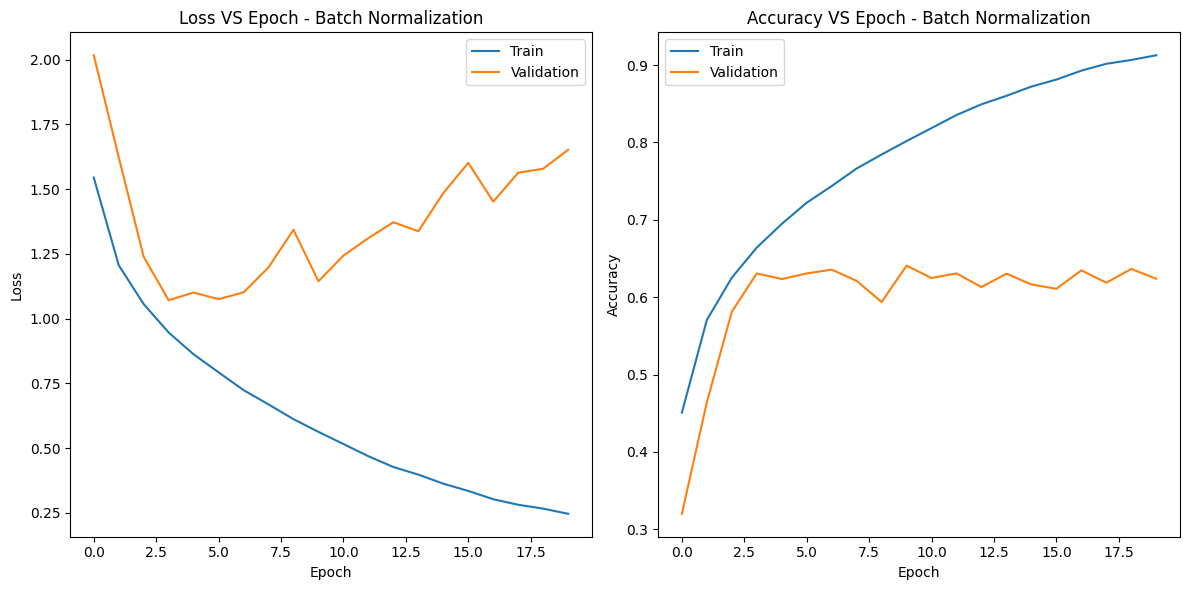

In [13]:
#Your code here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(cnn_batchnorm_history.history['loss'], label='Train')
axes[0].plot(cnn_batchnorm_history.history['val_loss'], label='Validation')
axes[0].set_title('Loss VS Epoch - Batch Normalization')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(cnn_batchnorm_history.history['accuracy'], label='Train')
axes[1].plot(cnn_batchnorm_history.history['val_accuracy'], label='Validation')
axes[1].set_title('Accuracy VS Epoch - Batch Normalization')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [14]:
#Your code here
test_loss_batchnorm, test_accuracy_batchnorm = cnn_batchnorm.evaluate(x_test, to_categorical(y_test, 10))
print(f'Test Loss with Batch Normalization: {test_loss_batchnorm:.4f}')
print(f'Test Accuracy with Batch Normalization: {test_accuracy_batchnorm:.4f}')

313/313 [==============================] - 4s 14ms/step - loss: 1.6330 - accuracy: 0.6140
Test Loss with Batch Normalization: 1.6330
Test Accuracy with Batch Normalization: 0.6140


In [15]:
print(f"Validation Accuracy with Original Model: {cnn_history.history['val_accuracy'][-1]}")
print(f"Validation Accuracy with Drop Out: {cnn_dropout_history.history['val_accuracy'][-1]}")
print(f"Validation Accuracy with Batch Normalization: {cnn_batchnorm_history.history['val_accuracy'][-1]}")

Validation Accuracy with Original Model: 0.5008999705314636
Validation Accuracy with Drop Out: 0.6150000095367432
Validation Accuracy with Batch Normalization: 0.6237999796867371


- Accuracy with Original Model: 0.5008999705314636
- Validation Accuracy with Drop Out: 0.6150000095367432
- Validation Accuracy with Batch Normalization: 0.6237999796867371
- Adding both drop out and batch normalization result in higher validation accuracy. However, it seems like batch normalization does a better job in preventing overfitting since it gets higher validation accuracy

## Natural Language Processing

We will train a supervised learning model to predict if a movie review has a positive or negative sentiment.

###**Dataset loading & dev/test splits**

1.1) Load the movie reviews dataset from NLTK library

In [16]:
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import movie_reviews
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1.2) Load the positive & negative reviews

In [17]:
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.raw(fileid)
    positive_reviews.append(words)

negative_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.raw(fileid)
    negative_reviews.append(words)

1.3) Make a data frame that has all reviews and their corresponding labels

In [18]:
# Your code here
positive_df = pd.DataFrame({'Review': positive_reviews, 'Label': 1})
negative_df = pd.DataFrame({'Review': negative_reviews, 'Label': 0})
reviews_df = pd.concat([positive_df, negative_df], ignore_index=True)
reviews_df = reviews_df.sample(frac=1, random_state=42).reset_index(drop=True)

1.4) Look at the class distribution of the movie reviews

In [19]:
# Your code here
class_distribution = reviews_df['Label'].value_counts()
print(class_distribution)

0    1000
1    1000
Name: Label, dtype: int64


1.5) Create a development & test split (80/20 ratio):

In [20]:
# Your code here
x = reviews_df['Review']
y = reviews_df['Label']
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## **Data preprocessing**

We will do some data preprocessing before we tokenize the data. You can use the re package in python to remove and and replace these strings.

1.6) Replace numbers in every review with ""

In [21]:
# Your code here
def remove_numbers(text):
    return re.sub(r'\d+', '', text)
x_dev = x_dev.apply(remove_numbers)
x_test = x_test.apply(remove_numbers)

1.7) Remove all stop words

In [22]:
# Your code here
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
x_dev = x_dev.apply(remove_stopwords)
x_test = x_test.apply(remove_stopwords)

1.8) Remove all punctuations

In [23]:
# Your code here
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
x_dev = x_dev.apply(remove_punctuation)
x_test = x_test.apply(remove_punctuation)

1.9) Apply stemming on the development & test datasets using Porter algorithm

In [24]:
# Your code here
porter_stemmer = PorterStemmer()
def apply_stemming(text):
    words = word_tokenize(text)
    stemmed_words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

x_dev = x_dev.apply(apply_stemming)
x_test = x_test.apply(apply_stemming)

1.10) Looking at the dataset do you think any other data pre-processing might be helpful? You can experiment with the features if you want to.
- lemmatization:
  - Instead of using porter_stemmer, I will recommend Lemmatization. Lemmatization is generally considered more precise and linguistically informed compared to Porter stemming. While both techniques aim to reduce words to their base form, lemmatization focuses on capturing the true meaning of words by transforming them to their dictionary form or lemma. This results in lemmatization being more suitable for tasks where semantic accuracy and language understanding are critical. In contrast, Porter stemming is a rule-based heuristic process that crudely removes prefixes or suffixes, leading to faster but less accurate word reduction. Lemmatization, by considering the context and semantics of words, provides a more refined and contextually relevant transformation, making it advantageous in applications that require a deeper understanding of language.

### 2) Model Training

2.1) Create bag of words features for each review in the development dataset

In [25]:
# Your code here
bow_vectorizer = CountVectorizer()
bow_features_dev = bow_vectorizer.fit_transform(x_dev)
bow_features_test = bow_vectorizer.transform(x_test)

2.2) Train a Logistic Regression model on the development dataset

In [26]:
# Your code here
bow_logreg_model = LogisticRegression()
bow_logreg_model.fit(bow_features_dev, y_dev)

LogisticRegression()

2.3) Create TF-IDF features for each review in the development dataset

In [27]:
# Your code here
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_features_dev = tf_idf_vectorizer.fit_transform(x_dev)
tf_idf_features_test = tf_idf_vectorizer.transform(x_test)

2.4) Train the Logistic Regression model on the development dataset with TF-IDF features

In [28]:
# Your code here
tf_idf_logreg_model = LogisticRegression()
tf_idf_logreg_model.fit(tf_idf_features_dev, y_dev)

LogisticRegression()

2.5) Compare the performance of the two models on the test dataset using a classication
report and the scores obtained. Explain the difference in results obtained.

In [29]:
# Your code here
# Predict on the test dataset
test_predictions = bow_logreg_model.predict(bow_features_test)
report = classification_report(y_test, test_predictions)
print(f"\nClassification Report for Logistic Regression on Test Dataset Using Bag of Words")
print(report)

test_predictions = tf_idf_logreg_model.predict(tf_idf_features_test)
report = classification_report(y_test, test_predictions)
print(f"\nClassification Report for Logistic Regression on Test Dataset Using TF-IDF")
print(report)


Classification Report for Logistic Regression on Test Dataset Using Bag of Words
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       200
           1       0.84      0.83      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


Classification Report for Logistic Regression on Test Dataset Using TF-IDF
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       200
           1       0.83      0.86      0.85       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



- Precision (Class 0):
  - BoW: 84%
  - TF-IDF: 86%
  - TF-IDF has slightly higher precision for predicting instances of Class 0.
- Recall (Class 0):
  - BoW: 84%
  - TF-IDF: 82%
  - BoW has a slightly higher recall for instances of Class 0.
- F1-Score (Class 0):
  - BoW: 84%
  - TF-IDF: 84%
  - Both representations have the same F1-score for predicting instances of Class 0.
- Precision (Class 1):
  - BoW: 84%
  - TF-IDF: 83%
  - BoW has slightly higher precision for predicting instances of Class 1.
- Recall (Class 1):
  - BoW: 83%
  - TF-IDF: 86%
  - TF-IDF has higher recall for instances of Class 1.
- F1-Score (Class 1):
  - BoW: 84%
  - TF-IDF: 85%
  - Both representations have similar F1-scores for predicting instances of Class 1.
- Accuracy:
  - Both models have the same overall accuracy of 84%.

Explanation:
- The differences in results indicate that the two representations capture different aspects of the data due to
  - Weighting Scheme:
    - BoW: Represents text as a matrix of word frequencies in the document without considering the importance of words in the corpus.
    - TF-IDF: Considers not only the frequency of a term in a document (TF) but also its importance in the entire corpus (IDF). Rare terms that are important in specific documents receive higher weights.
  - Impact of Word Frequency:
    - BoW: Treats all words equally, which may result in common words having a significant impact on the representation.
    - TF-IDF: Down-weights the impact of common words that appear frequently across documents, focusing on terms that are discriminative for specific documents.
  - Sensitivity to Rare Words:
    - BoW: Might not be sensitive to rare words that could be crucial for distinguishing between classes.
    - TF-IDF: Highlights the importance of rare words that might carry more discriminatory power.